In [1]:
# import common APIs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn import cross_validation, naive_bayes, tree, svm, ensemble
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve
from xgboost import XGBClassifier

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Data observation
filepath = '/Users/mac/Desktop/Kaggle_datasets/Indian_LiverDz/'
filename01 = 'indian_liver_patient.csv'

df = pd.read_csv(os.path.join(filepath, filename01))
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
df[df.Albumin_and_Globulin_Ratio.isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [5]:
df['Albumin_and_Globulin_Ratio'].fillna(df.Albumin_and_Globulin_Ratio.median(),inplace=True)

In [6]:
dict_Gender = {'Male':0,'Female':1}
df['Gender'] = df['Gender'].map(dict_Gender)

In [7]:
df['Dataset'] = np.abs(df['Dataset']-2)

In [8]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


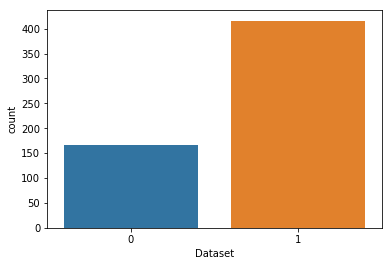

In [9]:
sns.countplot(x='Dataset', data=df); #0沒病，1有病

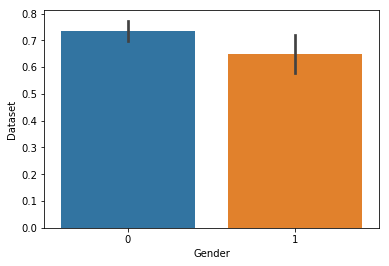

In [10]:
sns.barplot(x="Gender", y="Dataset", data=df); #0:male, 1:female

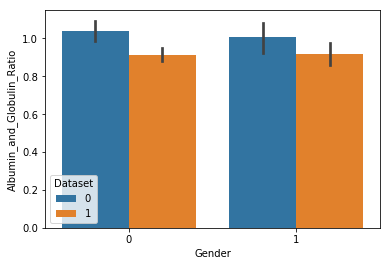

In [38]:
sns.barplot(x="Gender", y="Albumin_and_Globulin_Ratio", hue='Dataset', data=df); #0:male, 1:female

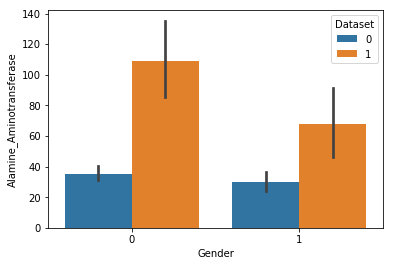

In [20]:
sns.barplot(x="Gender", y="Alamine_Aminotransferase", hue='Dataset', data=df); #0:male, 1:female

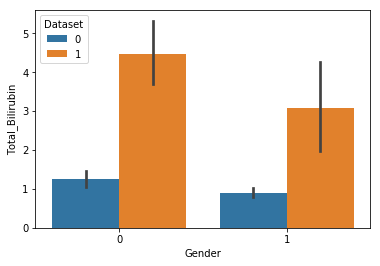

In [26]:
sns.barplot(x="Gender", y="Total_Bilirubin", hue='Dataset', data=df); #0:male, 1:female

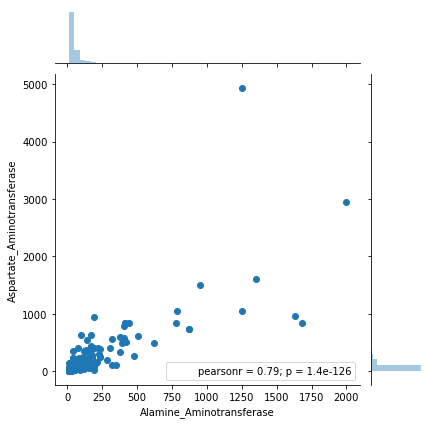

In [41]:
sns.jointplot(x=df.Alamine_Aminotransferase, y=df.Aspartate_Aminotransferase, );

In [12]:
D0 = df.loc[df.Dataset == 0]
D1 = df.loc[df.Dataset == 1]

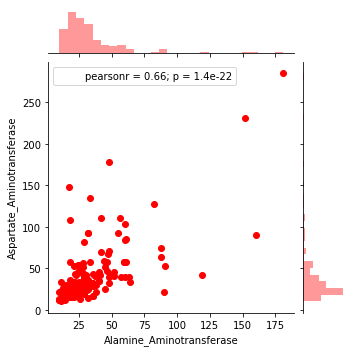

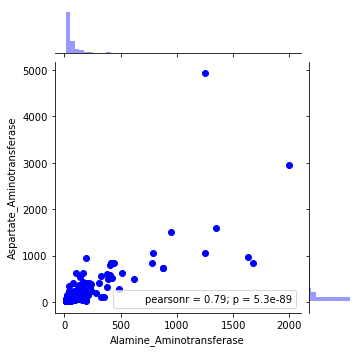

In [40]:
ax = sns.jointplot(D0.Alamine_Aminotransferase, D0.Aspartate_Aminotransferase, color="Red", size=5)
ax = sns.jointplot(D1.Alamine_Aminotransferase, D1.Aspartate_Aminotransferase, color="Blue", size=5)

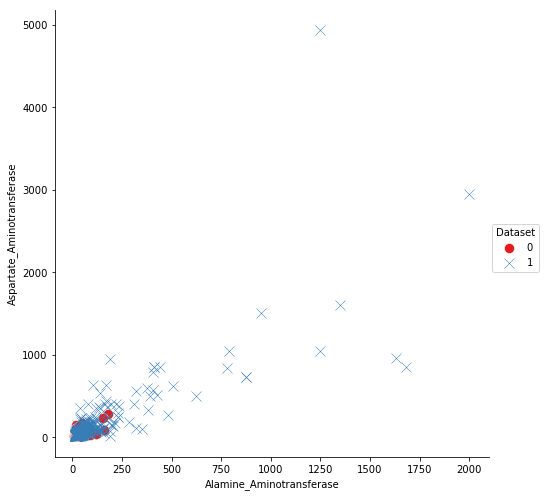

In [34]:
g = sns.FacetGrid(df, hue="Dataset", palette="Set1", size=7, hue_kws={"marker": ["o", "x"]})
g.map(plt.scatter, "Alamine_Aminotransferase", "Aspartate_Aminotransferase", 
      s=100, linewidth=.5, edgecolor="white",alpha=1)
g.add_legend();

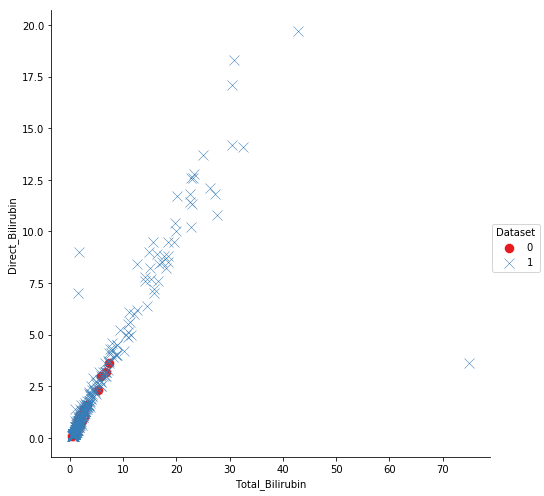

In [24]:
g = sns.FacetGrid(df, hue="Dataset", palette="Set1", size=7, hue_kws={"marker": ["o", "x"]})
g.map(plt.scatter, "Total_Bilirubin", "Direct_Bilirubin", 
      s=100, linewidth=.5, edgecolor="white",alpha=1)
g.add_legend();

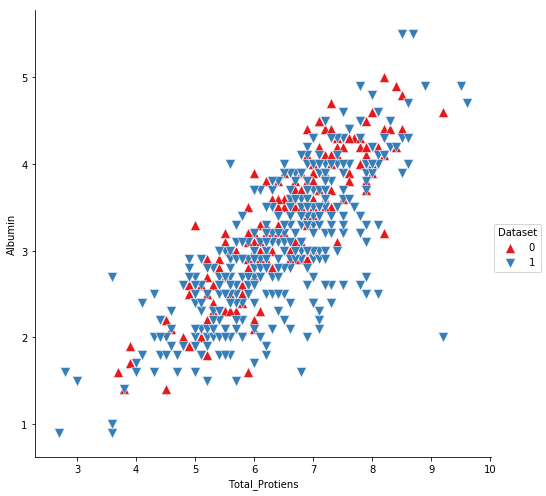

In [17]:
g = sns.FacetGrid(df, hue="Dataset", palette="Set1", size=7, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "Total_Protiens", "Albumin",
      s=100, linewidth=.5, edgecolor="white",alpha=1)
g.add_legend();

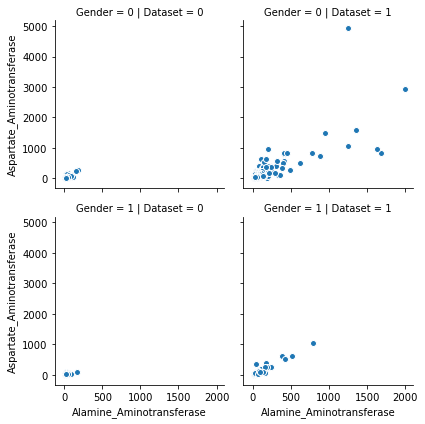

In [30]:
g = sns.FacetGrid(df, col="Dataset",  row="Gender", size=3)
g = g.map(plt.scatter, 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', edgecolor="w")

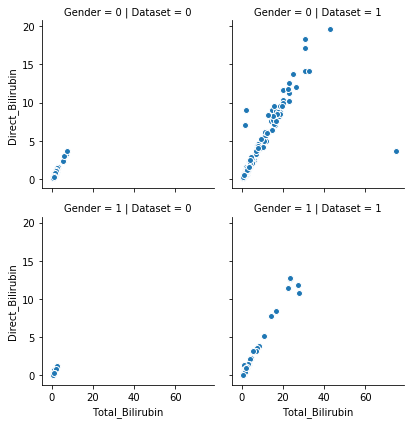

In [31]:
g = sns.FacetGrid(df, col="Dataset",  row="Gender", size=3)
g = g.map(plt.scatter, "Total_Bilirubin", "Direct_Bilirubin", edgecolor="w")

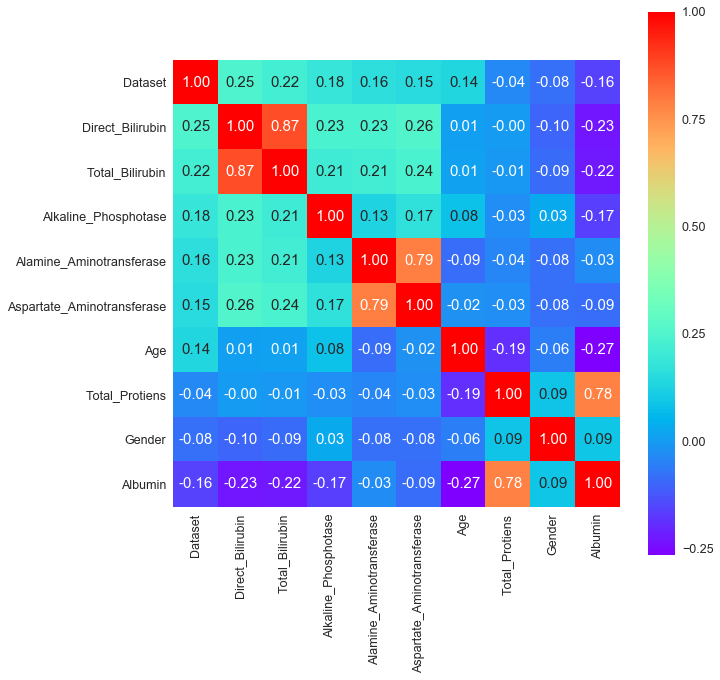

In [85]:
# Corr heatmap：直接看一排相關係數高低
k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'Dataset')['Dataset'].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(10,10)) #可以調整大小
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
                 yticklabels = cols.values, xticklabels = cols.values, cmap='rainbow')
#ax.xaxis.set_ticks_position('top') #特別用於confusion matrix好讀
plt.show()

In [86]:
# Data preprocessing
from sklearn.utils import shuffle

shuffle_df = shuffle(df, random_state=42)

df_label = shuffle_df['Dataset']
df_feature = shuffle_df.drop('Dataset', axis=1)

cut_point = round(len(df)*0.6)
train_feature = np.array(df_feature.values[:cut_point,:])
train_label = np.array(df_label.values[:cut_point])
test_feature = np.array(df_feature.values[cut_point:,:])
test_label = np.array(df_label.values[cut_point:])

In [89]:
### naive_bayes.BernoulliNB()
from sklearn import cross_validation, naive_bayes
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=naive_bayes.BernoulliNB()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.717143
Testing Score:0.708155

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        25
          1       0.72      1.00      0.83        63

avg / total       0.51      0.72      0.60        88


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        68
          1       0.71      1.00      0.83       165

avg / total       0.50      0.71      0.59       233



//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
### naive_bayes.GaussianNB()
from sklearn import cross_validation, naive_bayes
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=naive_bayes.GaussianNB()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.608571
Testing Score:0.592275

             precision    recall  f1-score   support

          0       0.41      0.88      0.56        25
          1       0.91      0.49      0.64        63

avg / total       0.77      0.60      0.62        88


             precision    recall  f1-score   support

          0       0.41      0.91      0.57        68
          1       0.93      0.46      0.62       165

avg / total       0.78      0.59      0.60       233



In [101]:
### tree.DecisionTreeClassifier()
from sklearn import cross_validation,tree
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.902857
Testing Score:0.716738

             precision    recall  f1-score   support

          0       0.30      0.28      0.29        25
          1       0.72      0.75      0.73        63

avg / total       0.60      0.61      0.61        88


             precision    recall  f1-score   support

          0       0.52      0.43      0.47        68
          1       0.78      0.84      0.81       165

avg / total       0.70      0.72      0.71       233



             precision    recall  f1-score   support

          0       0.52      0.43      0.47        68
          1       0.78      0.84      0.81       165

avg / total       0.70      0.72      0.71       233

[[ 29  39]
 [ 27 138]]


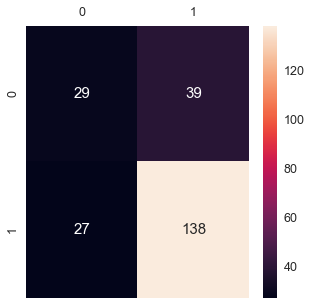

In [102]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d', annot_kws={'size':15}) #字體大小
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

In [103]:
# model_efficacy
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

total_num:  233
G1P1:  29
G0P1:  39
G1P0:  27
G0P0:  138
##########################
sensitivity:  0.517857142857
specificity:  0.836363636364
false_positive_rate:  0.220338983051
false_negative_rate:  0.482142857143


(233,
 0.5178571428571429,
 0.83636363636363631,
 0.22033898305084745,
 0.48214285714285715)

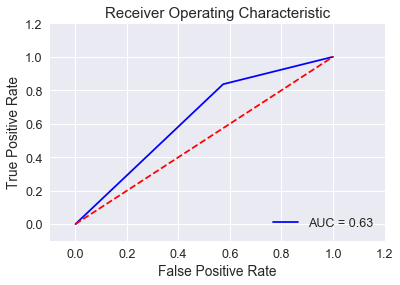

In [104]:
# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [92]:
### svm.LinearSVC()
from sklearn import cross_validation,svm
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=svm.LinearSVC()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.457143
Testing Score:0.454936

             precision    recall  f1-score   support

          0       0.35      0.96      0.52        25
          1       0.95      0.30      0.46        63

avg / total       0.78      0.49      0.47        88


             precision    recall  f1-score   support

          0       0.35      0.97      0.51        68
          1       0.95      0.24      0.39       165

avg / total       0.78      0.45      0.42       233



In [93]:
### ensemble.RandomForestClassifier()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf=ensemble.RandomForestClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.891429
Testing Score:0.699571

             precision    recall  f1-score   support

          0       0.23      0.20      0.21        25
          1       0.70      0.73      0.71        63

avg / total       0.56      0.58      0.57        88


             precision    recall  f1-score   support

          0       0.49      0.49      0.49        68
          1       0.79      0.79      0.79       165

avg / total       0.70      0.70      0.70       233



In [94]:
# XGBClassifier()
from xgboost import XGBClassifier
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf=XGBClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

y_predict2 = clf.predict(test_feature)
print('\n'+classification_report(test_label,y_predict2))

Traing Score:0.882857
Testing Score:0.686695

             precision    recall  f1-score   support

          0       0.23      0.12      0.16        25
          1       0.71      0.84      0.77        63

avg / total       0.57      0.64      0.59        88


             precision    recall  f1-score   support

          0       0.44      0.29      0.35        68
          1       0.74      0.85      0.79       165

avg / total       0.66      0.69      0.67       233

